# Backtest de modelos de aprendizado de máquina para previsão de séries temporais

#### Para saber o quao bom seu modelo é a melhor maneira é efetuar várias divisões em sua base de dados  e retreinar a rede. Um bom algorítmo deve ter o melhor desempenho possível na maioria de divisões. Com essas técnicas você tira o maior desultado possível com uma base de dados.

Gabriel Ghellere:
###### Adaptado de:
https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

Leitura recomendada:

* sklearn.model_selection.TimeSeriesSplit http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

* Rolling-Window Analysis of Time-Series Models https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html.

* Backtesting https://en.wikipedia.org/wiki/Backtesting.


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume '], dtype='object')

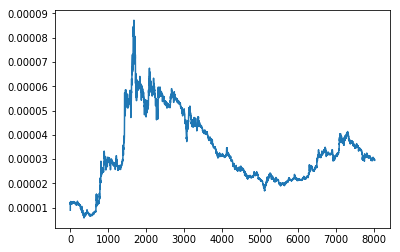

In [26]:
# Load sunspot data
from pandas import Series
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

df = pd.read_csv('ADABTC-thirtyMin-Jul, 2017-May, 2018.csv', header=0)
df.Close.plot()
df.head()
df.columns


# Maneiras de dividir o dataset

# Uma divisão (divisão simples)
#### Dividindo o dataset ponto de divisao 66 - 44

In [27]:
X = df.Close
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 8017
Training Observations: 5291
Testing Observations: 2726


# AQUI - A parte azul a rede é treinada
## A parte laranja é teste

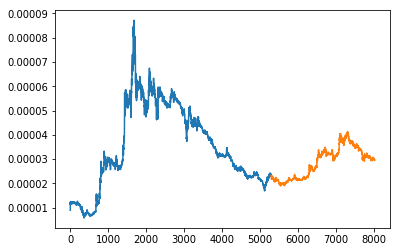

In [28]:
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

## Aumentando o numero de divisões
#### Para ter um resultado mais robusto pode-se dividir o conjunto várias vezes usando scykitlearn selecionando o n_splits o TimeSeriesSplit calcula as melhores divisoes.

#### Essa técnica permite treinar o modelo mais de uma vez com uma base de dados aumentando a consistência dos resultados

Formula:
training_size = i * n_samples / (n_splits + 1) + n_samples % (n_splits + 1)
test_size = n_samples / (n_splits + 1)

##### No scykit basta escolher o numero de splits que ele se encarrega de te dar os pontos

Observations: 4009
Training Observations: 2005
Testing Observations: 2004
Observations: 6013
Training Observations: 4009
Testing Observations: 2004
Observations: 8017
Training Observations: 6013
Testing Observations: 2004


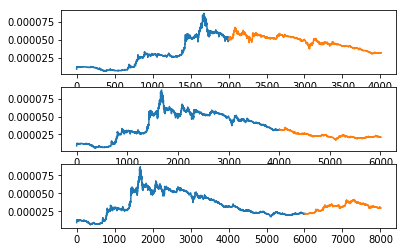

In [29]:
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(310 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

O uso de vários divisões de teste de treinamento resultará em mais modelos sendo treinados e, por sua vez, em uma estimativa mais precisa do desempenho dos modelos em dados não vistos.



# Walking forward Algorithm
#### É a melhor maneira de efetuar a divisao da base de dados, essa tecnica a cada vez que chegam novos dados no dataset o algotítmo calcula dinâmicamente o numero de divisoes para que sejam obtidos os melhores resultados no treinamento e aprendizado de máquina

Tem que respeitar dois parâmetros pra sua aplicação:

* Numero minimo de observações (treinamento) 500 no caso
* Definir se usaremos ou nao janela flutuante: Essa decisão tem que tomar pensando em decidir se o modelo será treinado em todos os dados disponíveis ou apenas nas observações mais recente

# DENTRO DESSE LOOP VOCÊ TREINA O MODELO

#### Isso permite muitas variações e divisões entre treinamento e teste garantindo um resultado final de predição mais próximo possível do real e tomará todo potêncial do seu modelo.

In [30]:
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
	train, test = X[0:i], X[i:i+1]
	print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

train=2713, test=1
train=2714, test=1
train=2715, test=1
train=2716, test=1
train=2717, test=1
train=2718, test=1
train=2719, test=1
train=2720, test=1
train=2721, test=1
train=2722, test=1
train=2723, test=1
train=2724, test=1
train=2725, test=1
train=2726, test=1
train=2727, test=1
train=2728, test=1
train=2729, test=1
train=2730, test=1
train=2731, test=1
train=2732, test=1
train=2733, test=1
train=2734, test=1
train=2735, test=1
train=2736, test=1
train=2737, test=1
train=2738, test=1
train=2739, test=1
train=2740, test=1
train=2741, test=1
train=2742, test=1
train=2743, test=1
train=2744, test=1
train=2745, test=1
train=2746, test=1
train=2747, test=1
train=2748, test=1
train=2749, test=1
train=2750, test=1
train=2751, test=1
train=2752, test=1
train=2753, test=1
train=2754, test=1
train=2755, test=1
train=2756, test=1
train=2757, test=1
train=2758, test=1
train=2759, test=1
train=2760, test=1
train=2761, test=1
train=2762, test=1
train=2763, test=1
train=2764, test=1
train=2765, 

train=4713, test=1
train=4714, test=1
train=4715, test=1
train=4716, test=1
train=4717, test=1
train=4718, test=1
train=4719, test=1
train=4720, test=1
train=4721, test=1
train=4722, test=1
train=4723, test=1
train=4724, test=1
train=4725, test=1
train=4726, test=1
train=4727, test=1
train=4728, test=1
train=4729, test=1
train=4730, test=1
train=4731, test=1
train=4732, test=1
train=4733, test=1
train=4734, test=1
train=4735, test=1
train=4736, test=1
train=4737, test=1
train=4738, test=1
train=4739, test=1
train=4740, test=1
train=4741, test=1
train=4742, test=1
train=4743, test=1
train=4744, test=1
train=4745, test=1
train=4746, test=1
train=4747, test=1
train=4748, test=1
train=4749, test=1
train=4750, test=1
train=4751, test=1
train=4752, test=1
train=4753, test=1
train=4754, test=1
train=4755, test=1
train=4756, test=1
train=4757, test=1
train=4758, test=1
train=4759, test=1
train=4760, test=1
train=4761, test=1
train=4762, test=1
train=4763, test=1
train=4764, test=1
train=4765, 

train=6774, test=1
train=6775, test=1
train=6776, test=1
train=6777, test=1
train=6778, test=1
train=6779, test=1
train=6780, test=1
train=6781, test=1
train=6782, test=1
train=6783, test=1
train=6784, test=1
train=6785, test=1
train=6786, test=1
train=6787, test=1
train=6788, test=1
train=6789, test=1
train=6790, test=1
train=6791, test=1
train=6792, test=1
train=6793, test=1
train=6794, test=1
train=6795, test=1
train=6796, test=1
train=6797, test=1
train=6798, test=1
train=6799, test=1
train=6800, test=1
train=6801, test=1
train=6802, test=1
train=6803, test=1
train=6804, test=1
train=6805, test=1
train=6806, test=1
train=6807, test=1
train=6808, test=1
train=6809, test=1
train=6810, test=1
train=6811, test=1
train=6812, test=1
train=6813, test=1
train=6814, test=1
train=6815, test=1
train=6816, test=1
train=6817, test=1
train=6818, test=1
train=6819, test=1
train=6820, test=1
train=6821, test=1
train=6822, test=1
train=6823, test=1
train=6824, test=1
train=6825, test=1
train=6826, 